<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/DATAthon/smokerpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

# EDA

In [ ]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (159256, 24)
Test Shape: (106171, 23)


In [ ]:
train.head(), test.head()

(   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
 0   0   55         165          60       81.0             0.5   
 1   1   70         165          65       89.0             0.6   
 2   2   20         170          75       81.0             0.4   
 3   3   35         180          95      105.0             1.5   
 4   4   30         165          60       80.5             1.5   
 
    eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
 0              0.6              1               1       135  ...   40   75   
 1              0.7              2               2       146  ...   57  126   
 2              0.5              1               1       118  ...   45   93   
 3              1.2              1               1       131  ...   38  102   
 4              1.0              1               1       121  ...   44   93   
 
    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
 0        16.5              1               1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [ ]:
# 통계 요약
train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0


In [ ]:
# 결측치 비율 확인
missing = train.isnull().mean().sort_values(ascending=False)
missing[missing > 0]   # 결측치가 있는 변수만 출력

,0


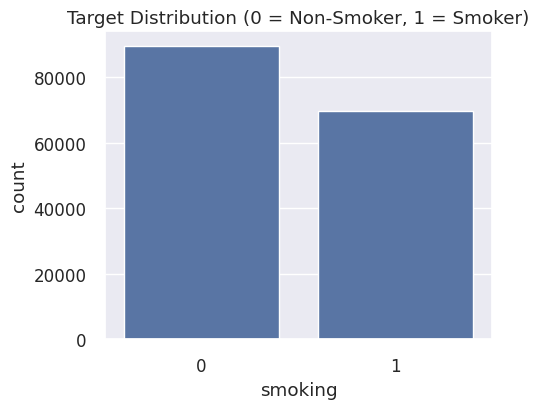

,proportion
smoking,
0,0.562635
1,0.437365


In [ ]:
# Target 분포 확인
plt.figure(figsize=(5,4))
sns.countplot(data=train, x="smoking")
plt.title("Target Distribution (0 = Non-Smoker, 1 = Smoker)")
plt.show()

train["smoking"].value_counts(normalize=True)

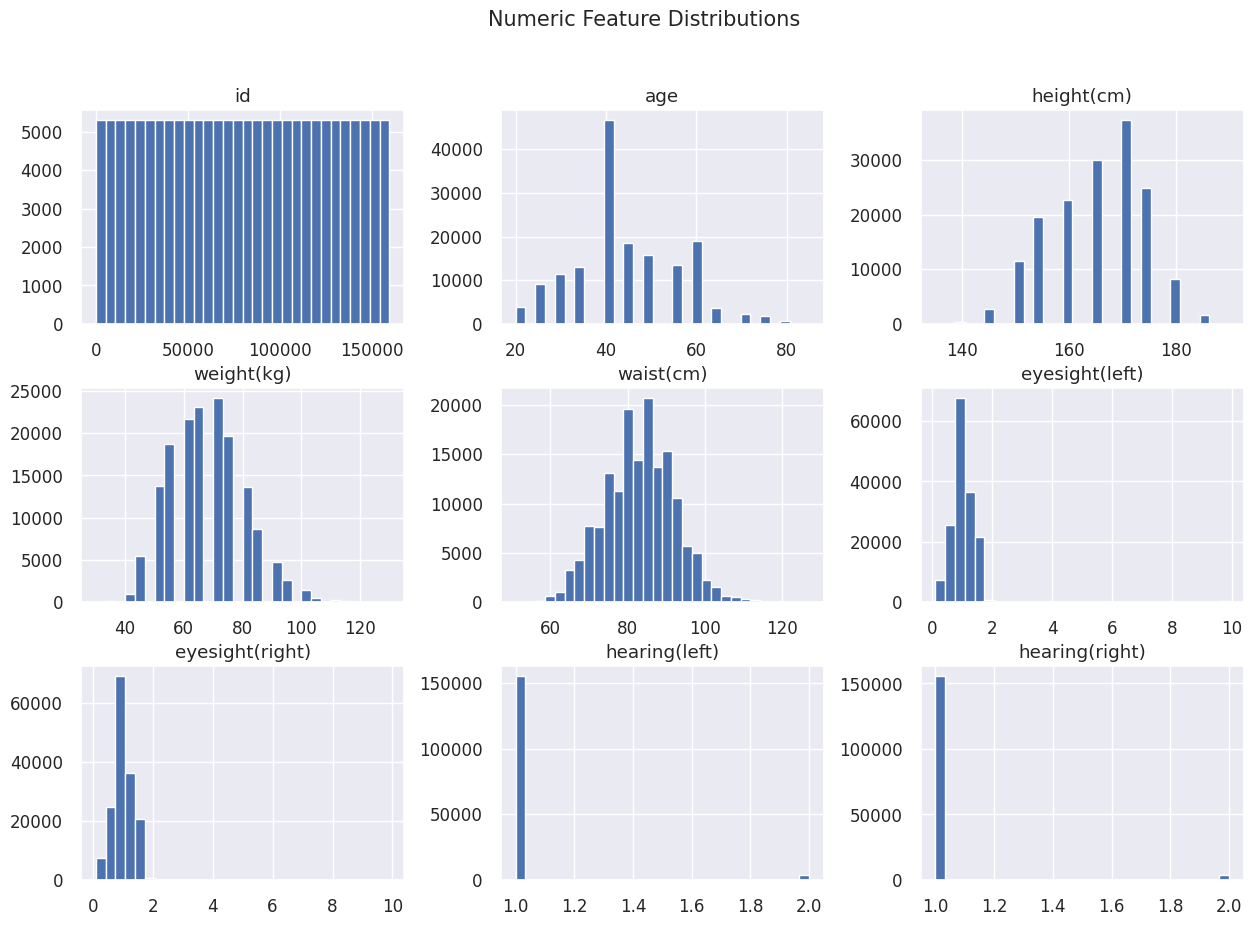

In [ ]:
# 수치형 변수 리스트 추출
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove("smoking")  # 타깃 제외

# 상위 9개만 샘플 시각화
sample_cols = num_cols[:9]

train[sample_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=15)
plt.show()

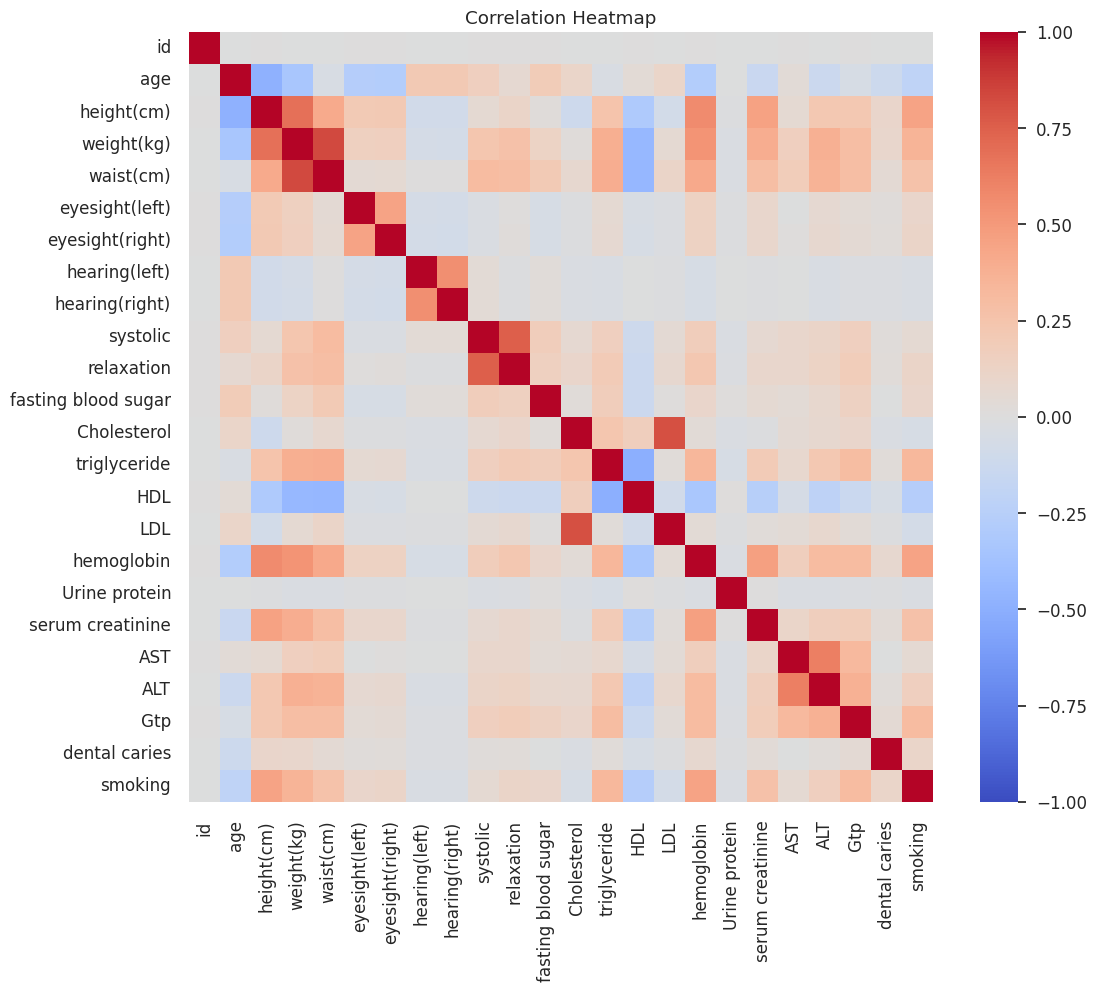

,smoking
smoking,1.000000
hemoglobin,0.450679
height(cm),0.447111
weight(kg),0.351748
triglyceride,0.331975
Gtp,0.305561
serum creatinine,0.272979
HDL,0.271186
waist(cm),0.262715
age,0.206033


In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(12,10))
corr = train[num_cols + ["smoking"]].corr()

sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# 타깃과 상관 높은 상위 변수 TOP10
corr["smoking"].abs().sort_values(ascending=False).head(10)

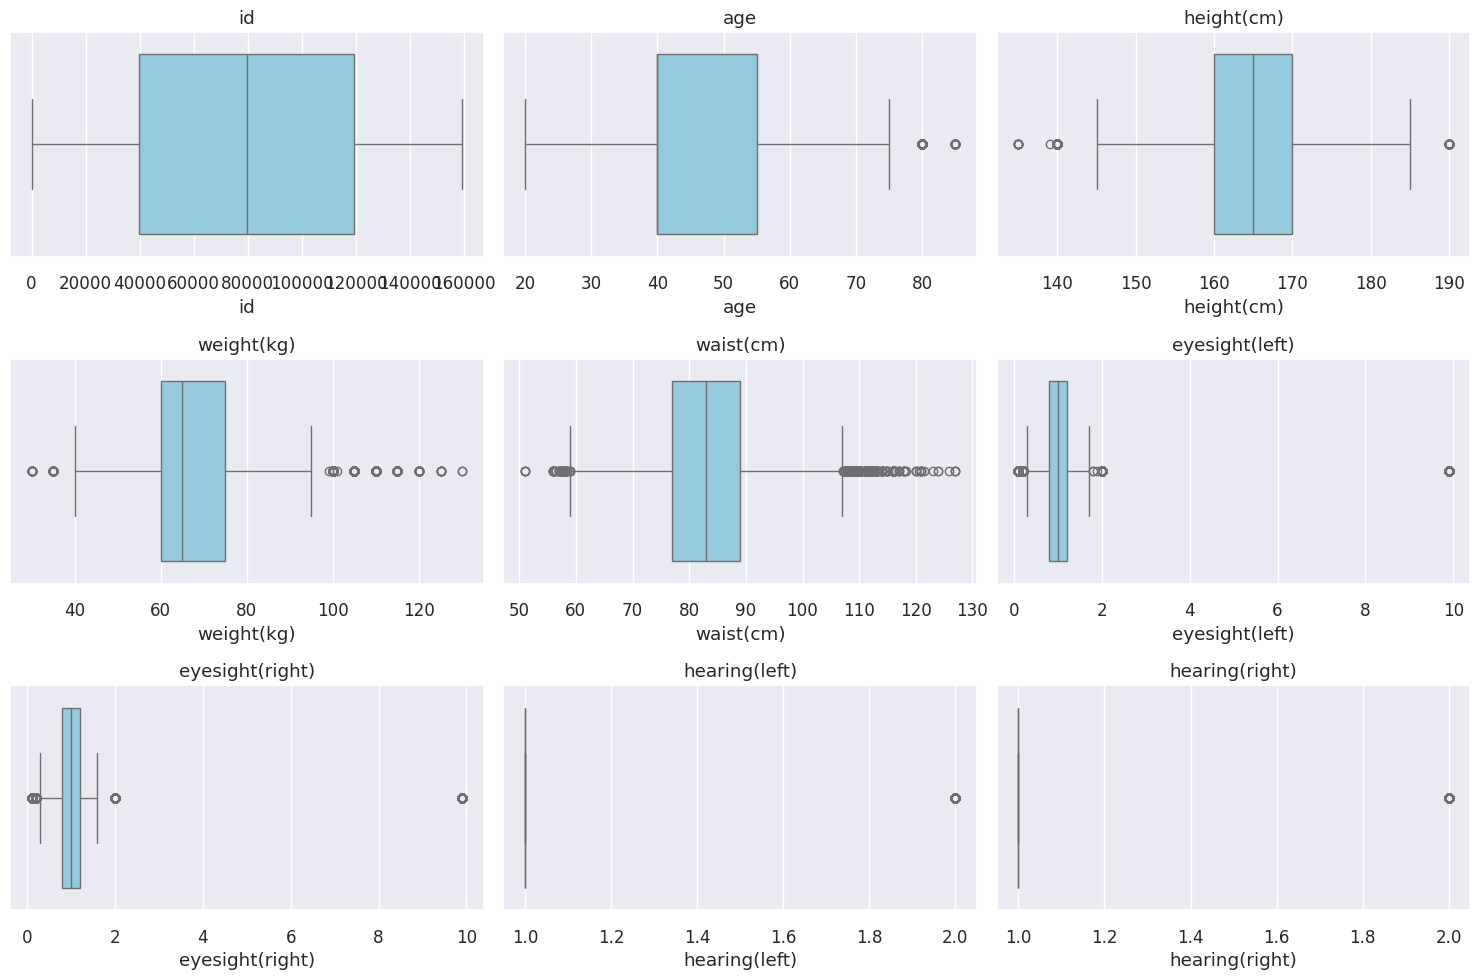

In [ ]:
# 박스플롯으로 이상치 탐색
plt.figure(figsize=(15,10))
for i, col in enumerate(sample_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

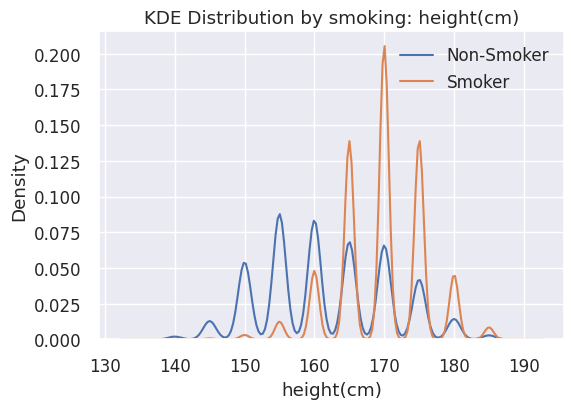

In [ ]:
# 타깃 분류에 따라 분포가 다른지 비교
feature = sample_cols[2]  # 아무 변수 하나 선택 (예: 0-첫 번째 컬럼)

plt.figure(figsize=(6,4))
sns.kdeplot(train[train["smoking"]==0][feature], label="Non-Smoker")
sns.kdeplot(train[train["smoking"]==1][feature], label="Smoker")
plt.title(f"KDE Distribution by smoking: {feature}")
plt.legend()
plt.show()

# Feature Engineering

In [ ]:
# 이상치 처리 (RobustScaler 또는 Winsorization(상위/하위 1~2% 컷))

In [ ]:
# 스케일링 (StandardScaler 또는 MinMaxScaler. 하지만 Tree 계열(LGBM, XGB)은 필요 없음)

In [ ]:
# Feature 생성 (비율 변수 / 차이 변수 / 조합 변수 등)

# Modeling

In [ ]:
# Baseline 모델 (Logistic Regression, LightGBM / XGBoost)

In [ ]:
# Ensemble 기반 모델링 (성능 순서 우선순위: CatBoost, LightGBM, XGBoost, CatBoost + LightGBM Stacking)

In [ ]:
# Stacking / Blending (Meta-Model(2층 모델): 1층-LGBM, CatBoost, XGB, 2층-Logistic / Ridge / LightGBM

In [ ]:
# Cross Validation (5-fold 또는 10-fold Stratified K-Fold. 의료/바이오 데이터는 안정성 위해 10-fold 선호)

# Hyperparameter Tuning

In [ ]:
# 자동 튜닝 활용

# 해석

In [ ]:
# Feature Importance

In [ ]:
# SHAP 분석

In [ ]:
# Partial Dependence Plot (PDP)